In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into the pandas environment and identify some basic details of the dataset.

In [82]:
data=pd.read_csv(r"C:\Users\User\Downloads\employee (1).csv")
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [5]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# Reset the index as "name".

In [83]:
data=data.set_index("name")
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# Select rows for specific names Jack Morgan and Josh Wills.

In [9]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


#  Select data for multiple values "Sales" and “Finance”.

In [10]:
df=data.loc[(data["department"]=="Sales")|(data["department"]=="Finance")]
df

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 700 performance score.

In [84]:
data[data["performance_score"]>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 500 and less than 700 performance score.

In [85]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Check and handle missing values in the dataset

In [86]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [87]:
#There are missing values in age,income and gender columns.

In [88]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [89]:
#we can fill misssing values of age and income columns with median.

In [90]:
for i in ['age','income']:
    data[i]=data[i].fillna(data[i].median())     
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [91]:
data.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [92]:
#using mode to fill the missing values in gender column
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [29]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [30]:
#No more missing values in the dataset

# Check the gender column and do Dummy encoding.

In [39]:
data.gender.nunique()

2

In [43]:
data1=pd.get_dummies(data['gender'])
data1

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


# Do the standard scaling on the feature performance score.

In [93]:
data['performance_score']

name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
James Authur      53
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [94]:
data['performance_score'].describe()

count      9.000000
mean     610.666667
std      235.671912
min       53.000000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [95]:
type(data["performance_score"])

pandas.core.series.Series

In [96]:
converted_array =np.array(data['performance_score']).reshape(-1, 1) 

from sklearn import preprocessing 

standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(converted_array)

X = pd.DataFrame(X)
X.describe()

,0
count,9.000000e+00
mean,2.035409e-16
std,1.060660e+00
min,-2.509823e+00
25%,-2.460317e-01
50%,2.850367e-01
75%,4.515581e-01
max,1.306668e+00


# Check the outliers and handle outliers in performance score using Percentiles.

In [97]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

Text(0.5, 1.0, 'Box plot of Performance score')

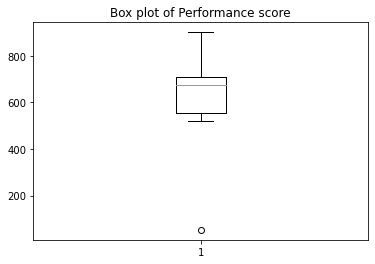

In [98]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of Performance score')

In [99]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
print("low_lim=",low_lim)
print("up_lim=",up_lim)

Q1= 556.0
Q2= 674.0
Q3= 711.0
IQR= 155.0
low_lim= 323.5
up_lim= 943.5


In [100]:
outlier=[]
for x in data['performance_score']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[53]

In [101]:
ind1=data['performance_score']<low_lim
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [102]:
data.drop(['James Authur'],inplace=True)

Text(0.5, 1.0, 'Box plot of Performance score')

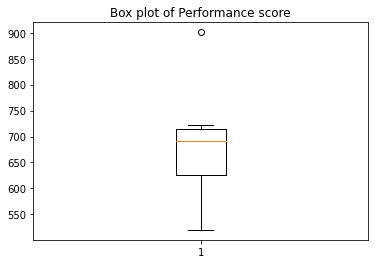

In [104]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of Performance score')